# Task 2

### Predictive modeling for customer bookings

#### Exploratory Data Analysis

In [10]:
import pandas as pd

In [24]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [11]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [13]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [14]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [15]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

## Encode Categorical Features

### Uses LabelEncoder to transform categorical columns into numerical values.

In [33]:
categorical_cols = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Verify encoding
data[categorical_cols].head()


,sales_channel,trip_type,flight_day,route,booking_origin
0,0,2,2,0,61
1,0,2,2,0,61
2,0,2,6,0,36
3,0,2,2,0,61
4,0,2,6,0,36


## Features and Target Variable

In [26]:
X = data.drop(columns=['booking_complete'])
y = data['booking_complete']


## Split Data into Training and Testing Sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train Random Forest Model

In [34]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Evaluate the Model

### Assess the model's performance using various classification metrics.
#### 🔹 Classification Report → Precision, recall, f1-score, and accuracy
#### 🔹 Confusion Matrix → Number of correct/incorrect predictions
#### 🔹 AUC-ROC Score → Measures how well the model distinguishes between classes

In [29]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_prob))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.57      0.11      0.19      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.55      0.55     10000
weighted avg       0.82      0.86      0.81     10000

Confusion Matrix:
[[8395  125]
 [1313  167]]
AUC-ROC Score: 0.7743073134754472


## Feature Importance

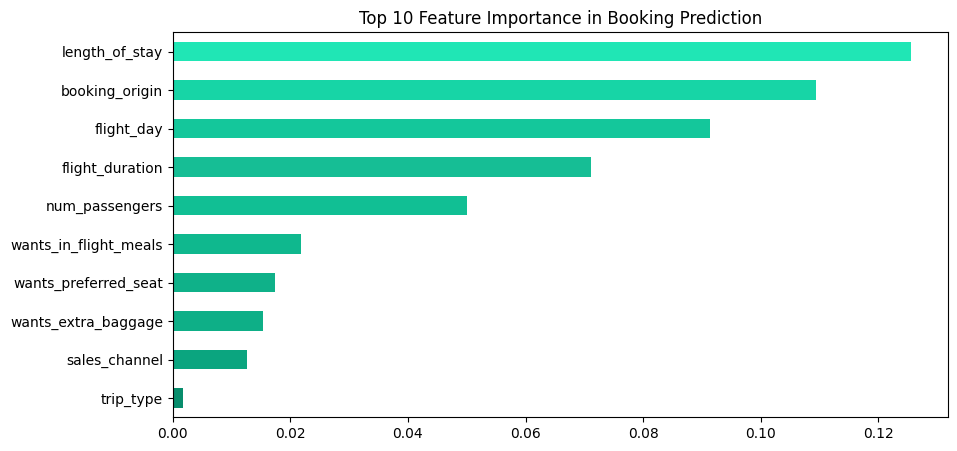

In [30]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
top_10_features = feature_importances.sort_values(ascending=True).head(10)

# Custom hex colors
custom_colors = ['#078d6c', '#0ba57f', '#0eaf87', '#0fb189', '#0fb88e', '#11bf94', '#16be95', '#14c79b', '#17d5a6', '#20e6b5']

top_10_features.plot(kind='barh', figsize=(10, 5), color=custom_colors)
plt.title("Best Feature Importance in Booking Prediction")
plt.show()
